In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Display the number of samples for each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data Preprocessing

In [5]:
# Drop the Id column as it is not significant here
df=df.drop(columns=["Id"])
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Converting class labels into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

Exploratory Data Analysis (EDA)

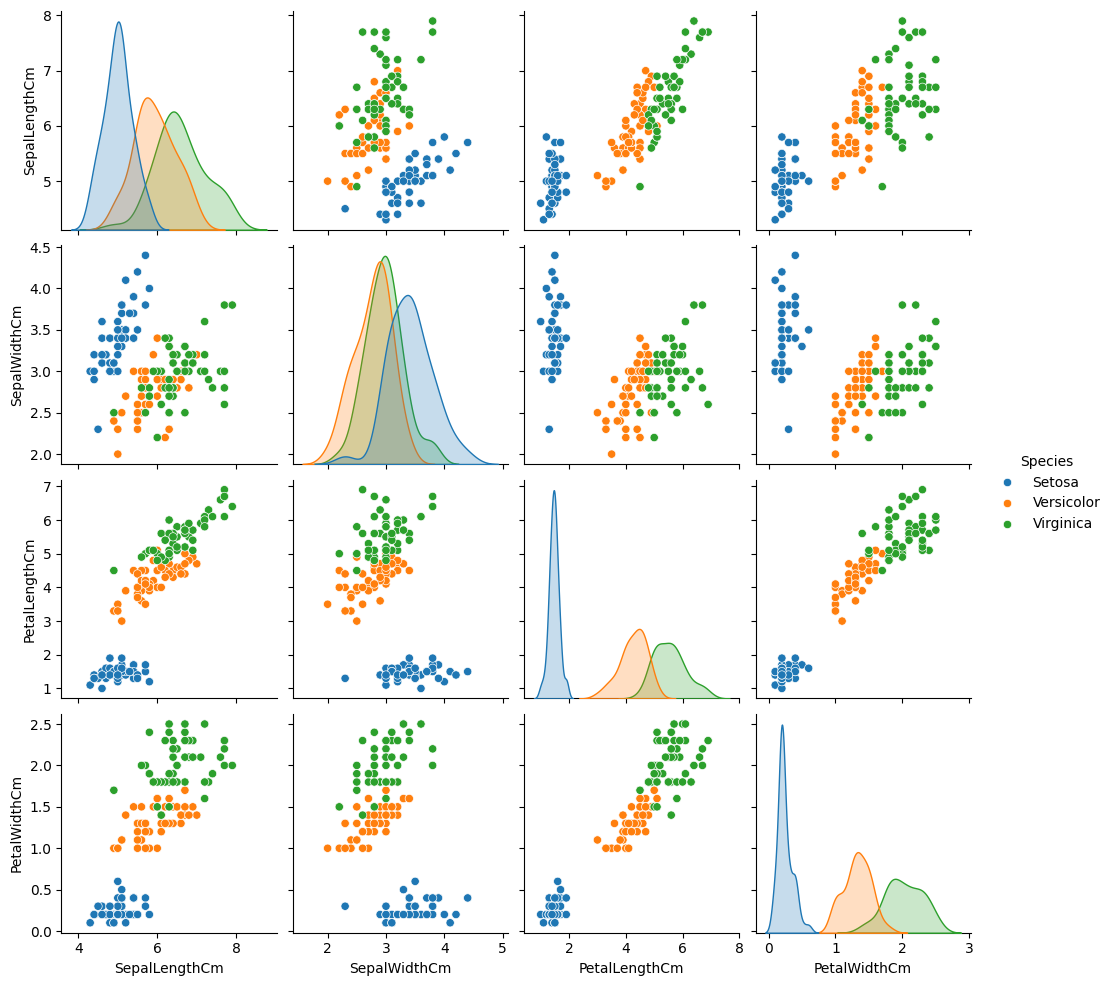

In [9]:
# Create a dictionary to map hue values
hue_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Map the "Species" column to the desired names
df['Species'] = df['Species'].map(hue_mapping)

# Create the pairplot with hue mapping and different diag_kind
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()

<Axes: >

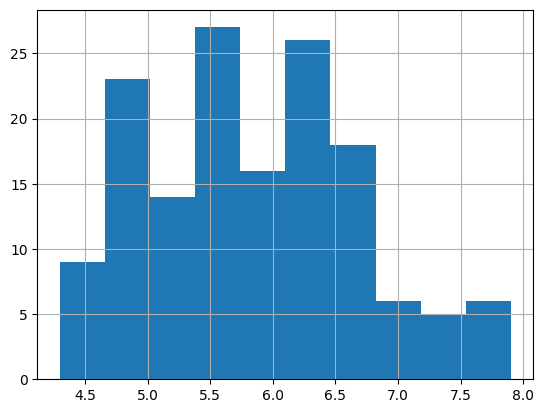

In [10]:
#Plotting histogram for each feature
df['SepalLengthCm'].hist()

<Axes: >

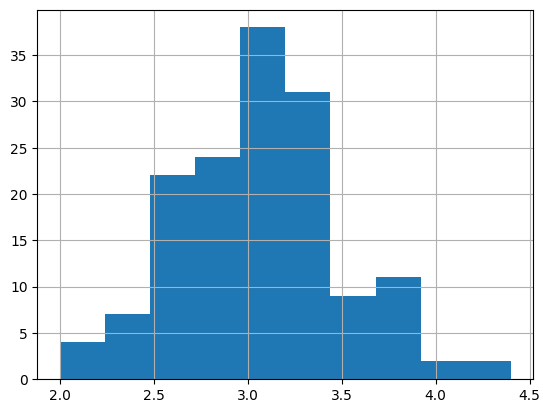

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

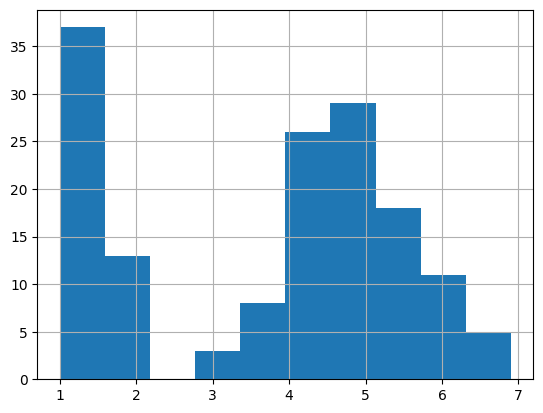

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

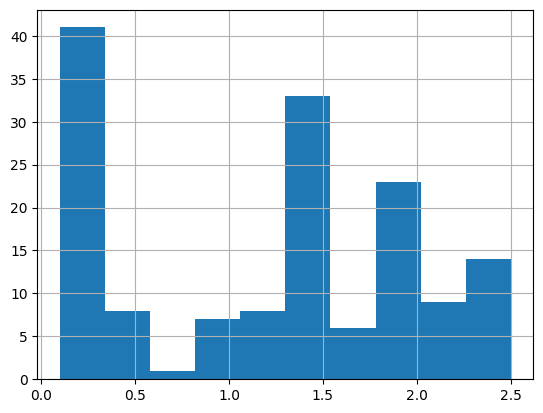

In [13]:
df['PetalWidthCm'].hist()

<Axes: >

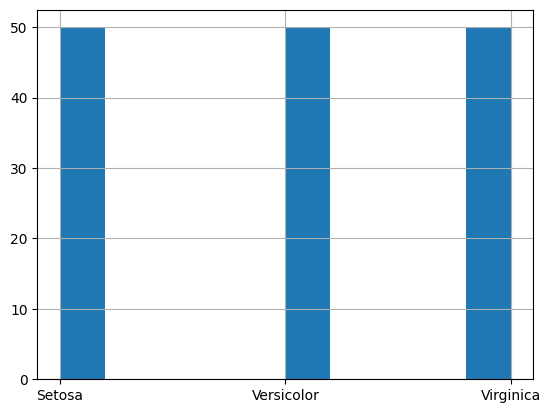

In [14]:
df['Species'].hist()

<Axes: >

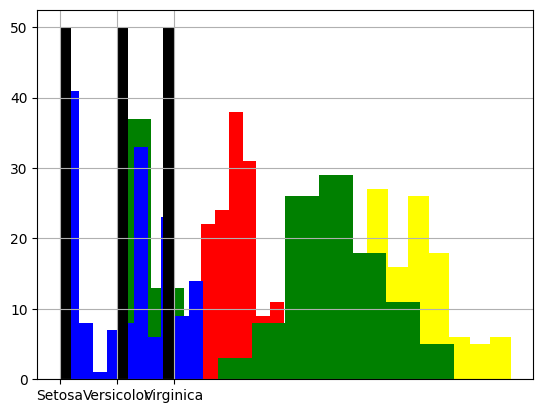

In [18]:
#Plotting the histogram for all the features together
df['SepalLengthCm'].hist(color = 'yellow')
df['SepalWidthCm'].hist(color = 'red')
df['PetalLengthCm'].hist(color = 'green')
df['PetalWidthCm'].hist(color = 'blue')
df['Species'].hist(color = 'black')

<Axes: ylabel='Species'>

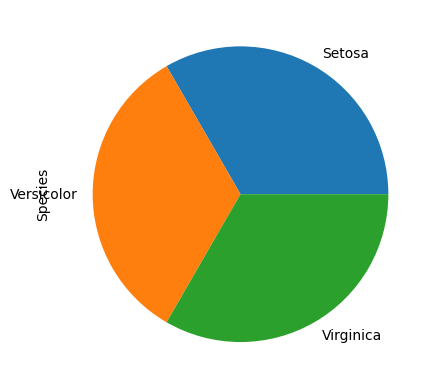

In [20]:
#Plotting the pie plot
df['Species'].value_counts().plot.pie()

Correlation Matrix

In [21]:
#To convert the "Species" column to numeric and then perform the correlation, we use the 'LabelEncoder'
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
le = LabelEncoder()

# Fit and transform the "Species" column to convert species names to integers
df['Species'] = le.fit_transform(df['Species'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


<Axes: >

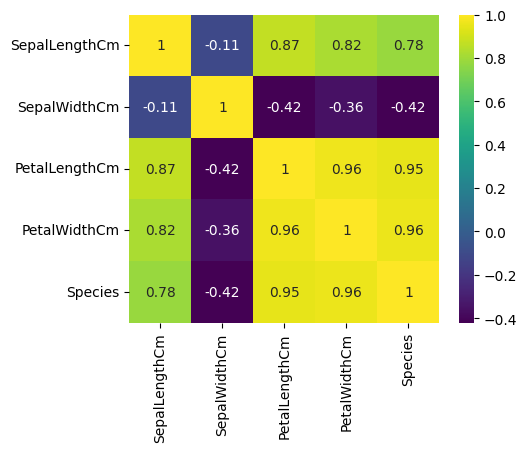

In [22]:
# display the correlation matrix using a heatmap
corr = correlation_matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')

Model Training

In [23]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [24]:
# Initializing logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# model fitting
model.fit(x_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model.score(x_test,y_test)*100)

Accuracy(Logistic Regression):  93.33333333333333
